In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tree import Tree
import tree_to_prism as tp

In [2]:
file = 'tree/Denial_of_Service.xml'
tree = Tree()
tree = tp.parse_file(file)
tree.root.to_string()

'Label: DenialofService\nRefinement: disjunctive\nType: Goal\nAction: \nCost: \nRole: Attacker'

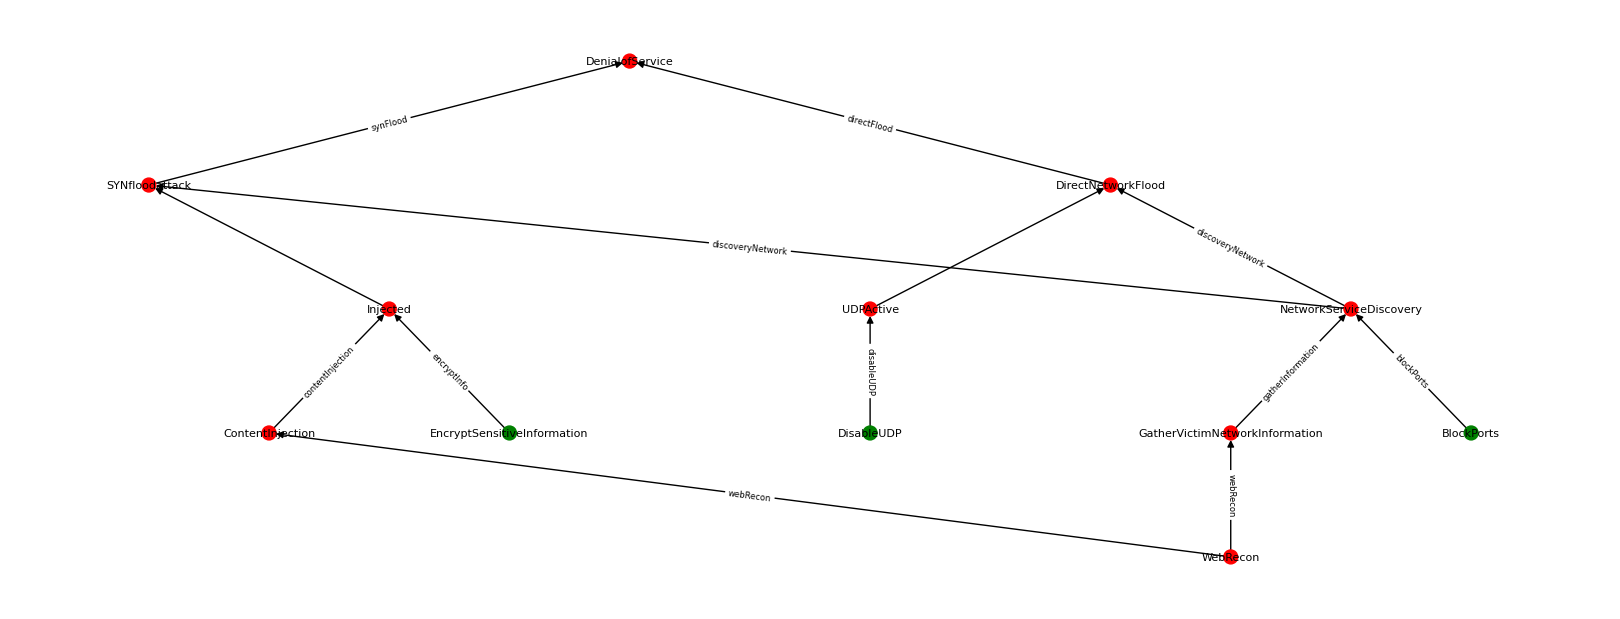

In [3]:
G = tree.to_graph()

fig = plt.figure(figsize=(16, 6))
pos = tree.hierarchy_pos(G, tree.root.label, width=500, xcenter=0.5) # get the position of the nodes

colors = []
for node in G.nodes: 
    colors.append(G.nodes[node]['color']) 
    
nx.draw(nx.reverse(G), pos, node_color=colors, with_labels=True, arrows=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'action') # get the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6) 

plt.show()

In [4]:
df = tree.to_dataframe()
df.head()

,Label,Refinement,Type,Action,Cost,Role,Parent,Children
0,DenialofService,disjunctive,Goal,,,Attacker,None,"{DirectNetworkFlood, SYNfloodattack}"
1,SYNfloodattack,conjunctive,Attribute,synFlood,150,Attacker,DenialofService,"{Injected, NetworkServiceDiscovery}"
2,DirectNetworkFlood,conjunctive,Attribute,directFlood,200,Attacker,DenialofService,"{UDPActive, NetworkServiceDiscovery}"
3,NetworkServiceDiscovery,conjunctive,Attribute,discoveryNetwork,50,Attacker,SYNfloodattack,"{GatherVictimNetworkInformation, BlockPorts}"
4,Injected,conjunctive,Attribute,,,Attacker,SYNfloodattack,"{ContentInjection, EncryptSensitiveInformation}"


In [5]:
string = tp.get_prism_model(tree) # get the prism model as a string
string

'smg\n\nplayer attacker\n\tattacker,\n\t[synFlood], [directFlood], [discoveryNetwork], [gatherInformation], [contentInjection], [webRecon]\nendplayer\nplayer defender\n\tdefender,\n\t[blockPorts], [encryptInfo], [disableUDP]\nendplayer\n\nglobal sched : [1..2];\n\nglobal DenialofService : bool;\nlabel "terminate" = DenialofService=true;\n\nglobal DirectNetworkFlood : bool;\nglobal SYNfloodattack : bool;\nglobal GatherVictimNetworkInformation : bool;\nglobal NetworkServiceDiscovery : bool;\nglobal Injected : bool init true;\nglobal UDPActive : bool init true;\n\nmodule attacker\n\n\tcontentInjection : bool;\n\twebRecon : bool;\n\tdiscoveryNetwork : bool;\n\tgatherInformation : bool;\n\tdirectFlood : bool;\n\tsynFlood : bool;\n\n\t[synFlood] sched=1 & !DenialofService & !DenialofService & !synFlood & (SYNfloodattack) -> (DenialofService\'=true) & (synFlood\'=true) & (sched\'=2);\n\t[directFlood] sched=1 & !DenialofService & !DenialofService & !directFlood & (DirectNetworkFlood) -> (Denia

In [6]:
tp.save_prism_model(string, 'model.prism')  # save the model to a file and create the properties file